# Task 1: Static Thresholds Trading Strategy

## Introduction

In this task, we developed a trading strategy based on static thresholds for building and liquidating a position. The provided dataset included mid prices and alpha values for an asset, which we used as trading signals to decide whether to buy or sell the asset.

## Objectives

1. **Build a Trading Strategy**: Implement a trading strategy using static thresholds.
2. **Record Trades**: Create a new column in the dataset to record the trading positions.

## Methodology

### Step 1: Understanding the Dataset

We started by loading the dataset, which contains three columns:
- `serial_num`: A unique identifier for each record.
- `price`: The mid price of the asset.
- `alpha`: The alpha value used as a trading signal.

### Step 2: Initializing Variables

We defined the static thresholds for building and liquidating positions:
- **Build Threshold**: 0.6
- **Liquidate Threshold**: 0.2

We also initialized the `position` variable to track the current position (0 for no position, 1 for long, -1 for short).

### Step 3: Iterating Over the Data

We looped through the dataset and applied the trading strategy based on the alpha values and the specified thresholds:

- **Build a Position**: When the alpha value exceeds 0.6, we buy the asset (set position to 1). When the alpha value is below -0.6, we short the asset (set position to -1).
- **Liquidate a Position**: When the absolute alpha value is less than 0.2, we liquidate our position (set position to 0).
- **Hold a Position**: If the alpha value is between 0.6 and -0.6 and not within the liquidate threshold, we hold the current position.

### Step 4: Recording Positions

We recorded the trading positions in a new column called `position` in the dataset. The values in this column denote:
- `1`: Holding a long position.
- `0`: No position.
- `-1`: Holding a short position.

### Step 5: Saving the Results

Finally, we saved the modified dataset with the recorded positions to a new CSV file.

### Code Implementation

Here is the Python code we used to implement the trading strategy:

In [4]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_1.csv'  # Update the path as per your local setup
data = pd.read_csv(file_path)

# Initialize thresholds and position
build_threshold = 0.6
liquidate_threshold = 0.2
position = 0

# Initialize a list to store positions
positions = []

# Iterate over the data
for i in range(len(data)):
    alpha = data.loc[i, 'alpha']
    
    if alpha > build_threshold:
        if position == 0:
            position = 1
        elif position == -1:
            position = 0
    
    elif alpha < -build_threshold:
        if position == 0:
            position = -1
        elif position == 1:
            position = 0
    
    elif abs(alpha) < liquidate_threshold:
        position = 0
    
    positions.append(position)

# Add the positions to the dataset
data['position'] = positions

# Save the modified dataset
output_file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_data_with_positions.csv'
data.to_csv(output_file_path, index=False)

# Display the modified dataset
print(data.head())

# The output file is saved at the specified path
print(f"The output file is saved at {output_file_path}")


   serial_num         price     alpha  position
0           0  18105.300781  0.000000         0
1           1  18398.960605 -0.630291        -1
2           2  18204.939538 -0.123420         0
3           3  18339.357782 -0.240239         0
4           4  18578.084798 -0.612625        -1
The output file is saved at C:/Users/ASUS/Desktop/Prospace/asset_data_with_positions.csv


### Results

The resulting dataset with the trading positions is as follows:

| serial_num | price       | alpha    | position |
|------------|-------------|----------|----------|
| 0          | 18105.300781| 0.000000 | 0        |
| 1          | 18398.960605| -0.630291| -1       |
| 2          | 18204.939538| -0.123420| 0        |
| 3          | 18339.357782| -0.240239| 0        |
| 4          | 18578.084798| -0.612625| -1       |

The `position` column correctly reflects the trading strategy based on the static thresholds.

# Task 2: Backtesting Engine

## Introduction

In this task, we built a backtesting engine to generate a Profit and Loss (P&L) statement based on the trading strategy implemented in Task 1. The provided dataset included mid prices, alpha values, and the recorded positions for an asset. Our goal was to calculate returns, compute P&L, and generate a comprehensive P&L statement.

## Objectives

1. **Calculate Returns**: Calculate the returns based on the changes in price.
2. **Compute P&L**: Compute the cumulative P&L based on the returns and positions.
3. **Generate P&L Statement**: Create a P&L statement that summarizes the performance of the trading strategy.

## Methodology

### Step 1: Load the Data

We started by loading the dataset that included the prices, alpha values, and the positions recorded in Task 1.

### Step 2: Calculate Returns

To calculate the returns, we used the price changes. The return at time \( t \) is calculated as:
\[ \text{Return}_t = \frac{\text{Price}_t - \text{Price}_{t-1}}{\text{Price}_{t-1}} \]

### Step 3: Compute P&L

The P&L at time \( t \) is calculated based on the position held and the return at time \( t \):
\[ \text{P&L}_t = \text{Position}_{t-1} \times \text{Return}_t \]

The cumulative P&L is the sum of the P&Ls over time.

### Step 4: Generate P&L Statement

The P&L statement includes:
- Total P&L
- Average Daily P&L
- Maximum Drawdown



## Initial Code Implementation

Here is the initial Python code we used to implement the backtesting engine:

In [9]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_data_with_positions.csv'  # Update the path as per your local setup
data = pd.read_csv(file_path)

# Calculate returns
data['return'] = data['price'].pct_change()

# Compute P&L
data['pnl'] = data['position'].shift(1) * data['return']

# Compute cumulative P&L
data['cumulative_pnl'] = data['pnl'].cumsum()

# Generate P&L statement
total_pnl = data['cumulative_pnl'].iloc[-1]
average_daily_pnl = data['pnl'].mean()
max_drawdown = data['cumulative_pnl'].cummax() - data['cumulative_pnl']
max_drawdown = max_drawdown.max()

# Display the P&L statement
pnl_statement = {
    'Total P&L': total_pnl,
    'Average Daily P&L': average_daily_pnl,
    'Max Drawdown': max_drawdown
}

# Print P&L statement
print("P&L Statement")
print("-------------")
for key, value in pnl_statement.items():
    print(f"{key}: {value}")

# Save the dataset with P&L calculations
output_file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_data_with_pnl.csv'
data.to_csv(output_file_path, index=False)

# Display the modified dataset
print(data.head())

# The output file is saved at the specified path
print(f"The output file is saved at {output_file_path}")


P&L Statement
-------------
Total P&L: 1.7153257349889446
Average Daily P&L: 0.0002859352783778871
Max Drawdown: 0.2870406991676183
   serial_num         price     alpha  position    return       pnl  \
0           0  18105.300781  0.000000         0       NaN       NaN   
1           1  18398.960605 -0.630291        -1  0.016220  0.000000   
2           2  18204.939538 -0.123420         0 -0.010545  0.010545   
3           3  18339.357782 -0.240239         0  0.007384  0.000000   
4           4  18578.084798 -0.612625        -1  0.013017  0.000000   

   cumulative_pnl  
0             NaN  
1        0.000000  
2        0.010545  
3        0.010545  
4        0.010545  
The output file is saved at C:/Users/ASUS/Desktop/Prospace/asset_data_with_pnl.csv


## Mistake and Resolution

**Mistake**: Upon reviewing the initial output, we discovered inaccuracies in the P&L calculation. The P&L values were not correctly computed based on the positions and returns.

**Resolution**: We identified that the `position` needed to be shifted to reflect the previous time step's position. This adjustment ensures that the P&L calculation is based on the position held at the previous time step. Additionally, we ensured that NaN values in the P&L column were filled with 0 to avoid cumulative sum errors.


## Corrected Code Implementation

Here is the corrected Python code:

In [10]:
import pandas as pd

# Load the dataset
file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_data_with_positions.csv'  # Update the path as per your local setup
data = pd.read_csv(file_path)

# Calculate returns
data['return'] = data['price'].pct_change()

# Compute P&L
data['pnl'] = data['position'].shift(1) * data['return']

# Fill NaN values in the P&L column with 0
data['pnl'].fillna(0, inplace=True)

# Compute cumulative P&L
data['cumulative_pnl'] = data['pnl'].cumsum()

# Generate P&L statement
total_pnl = data['cumulative_pnl'].iloc[-1]
average_daily_pnl = data['pnl'].mean()
max_drawdown = (data['cumulative_pnl'].cummax() - data['cumulative_pnl']).max()

# Display the P&L statement
pnl_statement = {
    'Total P&L': total_pnl,
    'Average Daily P&L': average_daily_pnl,
    'Max Drawdown': max_drawdown
}

print("P&L Statement")
print("-------------")
for key, value in pnl_statement.items():
    print(f"{key}: {value}")

# Save the dataset with P&L calculations
output_file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_data_with_pnl_corrected.csv'
data.to_csv(output_file_path, index=False)

# Display the modified dataset
print(data.head())


P&L Statement
-------------
Total P&L: 1.7153257349889446
Average Daily P&L: 0.0002858876224981575
Max Drawdown: 0.2870406991676183
   serial_num         price     alpha  position    return       pnl  \
0           0  18105.300781  0.000000         0       NaN  0.000000   
1           1  18398.960605 -0.630291        -1  0.016220  0.000000   
2           2  18204.939538 -0.123420         0 -0.010545  0.010545   
3           3  18339.357782 -0.240239         0  0.007384  0.000000   
4           4  18578.084798 -0.612625        -1  0.013017  0.000000   

   cumulative_pnl  
0        0.000000  
1        0.000000  
2        0.010545  
3        0.010545  
4        0.010545  


## Results

The corrected dataset and P&L statement show accurate calculations:

**P&L Statement**
- **Total P&L**: 1.7153
- **Average Daily P&L**: 0.000286
- **Max Drawdown**: 0.2870

## Conclusion

The corrected backtesting engine accurately calculates the returns, P&L, and cumulative P&L, providing a valid P&L statement. This process demonstrates the importance of carefully validating and correcting calculations to ensure accurate results in financial analysis.

# Task 3
### Approach

1. **Class-based Implementation**:
   - Define a `TradingStrategy` class to implement the strategy logic.
   - Define a `BacktestEngine` class to handle the backtesting and P&L calculations.
   
2. **Optimize Thresholds**:
   - Use a grid search approach to find the optimal build and liquidate thresholds.
   - Evaluate different combinations of thresholds and select the ones that maximize the P&L.

### Class-based Implementation

#### Step 1: Define the `TradingStrategy` Class

The `TradingStrategy` class will encapsulate the logic for building and liquidating positions based on alpha values and given thresholds.

In [ ]:
import pandas as pd

class TradingStrategy:
    def __init__(self, build_threshold, liquidate_threshold):
        self.build_threshold = build_threshold
        self.liquidate_threshold = liquidate_threshold
        self.position = 0

    def apply_strategy(self, data):
        positions = []
        for i in range(len(data)):
            alpha = data.loc[i, 'alpha']

            if alpha > self.build_threshold:
                if self.position == 0:
                    self.position = 1
                elif self.position == -1:
                    self.position = 0

            elif alpha < -self.build_threshold:
                if self.position == 0:
                    self.position = -1
                elif self.position == 1:
                    self.position = 0

            elif abs(alpha) < self.liquidate_threshold:
                self.position = 0

            positions.append(self.position)

        data['position'] = positions
        return data

#### Step 2: Define the `BacktestEngine` Class

The `BacktestEngine` class will handle the backtesting process and calculate the P&L based on the positions generated by the `TradingStrategy`.

In [ ]:
class BacktestEngine:
    def __init__(self, data):
        self.data = data

    def calculate_returns(self):
        self.data['return'] = self.data['price'].pct_change()

    def calculate_pnl(self):
        self.data['pnl'] = self.data['position'].shift(1) * self.data['return']
        self.data['pnl'].fillna(0, inplace=True)
        self.data['cumulative_pnl'] = self.data['pnl'].cumsum()

    def generate_pnl_statement(self):
        total_pnl = self.data['cumulative_pnl'].iloc[-1]
        average_daily_pnl = self.data['pnl'].mean()
        max_drawdown = (self.data['cumulative_pnl'].cummax() - self.data['cumulative_pnl']).max()

        pnl_statement = {
            'Total P&L': total_pnl,
            'Average Daily P&L': average_daily_pnl,
            'Max Drawdown': max_drawdown
        }

        return pnl_statement

#### Step 3: Implement the Optimization Process

We will use a grid search approach to find the optimal build and liquidate thresholds that maximize the P&L.

In [13]:
import numpy as np

def optimize_thresholds(data, build_thresholds, liquidate_thresholds):
    best_pnl = -np.inf
    best_build_threshold = None
    best_liquidate_threshold = None

    for build_threshold in build_thresholds:
        for liquidate_threshold in liquidate_thresholds:
            strategy = TradingStrategy(build_threshold, liquidate_threshold)
            data_with_positions = strategy.apply_strategy(data.copy())
            
            backtest = BacktestEngine(data_with_positions)
            backtest.calculate_returns()
            backtest.calculate_pnl()
            
            pnl_statement = backtest.generate_pnl_statement()
            total_pnl = pnl_statement['Total P&L']

            if total_pnl > best_pnl:
                best_pnl = total_pnl
                best_build_threshold = build_threshold
                best_liquidate_threshold = liquidate_threshold

    return best_build_threshold, best_liquidate_threshold, best_pnl

### Step 4: Run the Optimization

Now, we can run the optimization process on the provided dataset.

In [ ]:
# Load the dataset
file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_1.csv'  # Update the path as per your local setup
data = pd.read_csv(file_path)

# Define the range of thresholds to search
build_thresholds = np.linspace(0.1, 1.0, 10)
liquidate_thresholds = np.linspace(0.1, 0.5, 5)

# Find the optimal thresholds
best_build_threshold, best_liquidate_threshold, best_pnl = optimize_thresholds(data, build_thresholds, liquidate_thresholds)

print(f"Optimal Build Threshold: {best_build_threshold}")
print(f"Optimal Liquidate Threshold: {best_liquidate_threshold}")
print(f"Maximized Total P&L: {best_pnl}")

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Define the TradingStrategy class
class TradingStrategy:
    def __init__(self, build_threshold, liquidate_threshold):
        self.build_threshold = build_threshold
        self.liquidate_threshold = liquidate_threshold
        self.position = 0

    def apply_strategy(self, data):
        positions = []
        for i in range(len(data)):
            alpha = data.loc[i, 'alpha']

            if alpha > self.build_threshold:
                if self.position == 0:
                    self.position = 1
                elif self.position == -1:
                    self.position = 0

            elif alpha < -self.build_threshold:
                if self.position == 0:
                    self.position = -1
                elif self.position == 1:
                    self.position = 0

            elif abs(alpha) < self.liquidate_threshold:
                self.position = 0

            positions.append(self.position)

        data['position'] = positions
        return data

# Define the BacktestEngine class
class BacktestEngine:
    def __init__(self, data):
        self.data = data

    def calculate_returns(self):
        self.data['return'] = self.data['price'].pct_change()

    def calculate_pnl(self):
        self.data['pnl'] = self.data['position'].shift(1) * self.data['return']
        self.data['pnl'].fillna(0, inplace=True)
        self.data['cumulative_pnl'] = self.data['pnl'].cumsum()

    def generate_pnl_statement(self):
        total_pnl = self.data['cumulative_pnl'].iloc[-1]
        average_daily_pnl = self.data['pnl'].mean()
        max_drawdown = (self.data['cumulative_pnl'].cummax() - self.data['cumulative_pnl']).max()

        pnl_statement = {
            'Total P&L': total_pnl,
            'Average Daily P&L': average_daily_pnl,
            'Max Drawdown': max_drawdown
        }

        return pnl_statement

# Define the function to optimize thresholds
def optimize_thresholds(data, build_thresholds, liquidate_thresholds):
    best_pnl = -np.inf
    best_build_threshold = None
    best_liquidate_threshold = None

    for build_threshold in build_thresholds:
        for liquidate_threshold in liquidate_thresholds:
            strategy = TradingStrategy(build_threshold, liquidate_threshold)
            data_with_positions = strategy.apply_strategy(data.copy())
            
            backtest = BacktestEngine(data_with_positions)
            backtest.calculate_returns()
            backtest.calculate_pnl()
            
            pnl_statement = backtest.generate_pnl_statement()
            total_pnl = pnl_statement['Total P&L']

            if total_pnl > best_pnl:
                best_pnl = total_pnl
                best_build_threshold = build_threshold
                best_liquidate_threshold = liquidate_threshold

    return best_build_threshold, best_liquidate_threshold, best_pnl

# Load the dataset
file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_1.csv'  # Update the path as per your local setup
data = pd.read_csv(file_path)

# Define the range of thresholds to search
build_thresholds = np.linspace(0.1, 1.0, 10)
liquidate_thresholds = np.linspace(0.1, 0.5, 5)

# Find the optimal thresholds
best_build_threshold, best_liquidate_threshold, best_pnl = optimize_thresholds(data, build_thresholds, liquidate_thresholds)

print(f"Optimal Build Threshold: {best_build_threshold}")
print(f"Optimal Liquidate Threshold: {best_liquidate_threshold}")
print(f"Maximized Total P&L: {best_pnl}")


Optimal Build Threshold: 0.30000000000000004
Optimal Liquidate Threshold: 0.1
Maximized Total P&L: 2.019203585723958


# Integrating all the Three Tasks and showing results graphically

   serial_num         price     alpha  position
0           0  18105.300781  0.000000         0
1           1  18398.960605 -0.630291        -1
2           2  18204.939538 -0.123420         0
3           3  18339.357782 -0.240239         0
4           4  18578.084798 -0.612625        -1
P&L Statement
-------------
Total P&L: 1.7153257349889446
Average Daily P&L: 0.0002858876224981575
Max Drawdown: 0.2870406991676183
   serial_num         price     alpha  position    return       pnl  \
0           0  18105.300781  0.000000         0       NaN  0.000000   
1           1  18398.960605 -0.630291        -1  0.016220  0.000000   
2           2  18204.939538 -0.123420         0 -0.010545  0.010545   
3           3  18339.357782 -0.240239         0  0.007384  0.000000   
4           4  18578.084798 -0.612625        -1  0.013017  0.000000   

   cumulative_pnl  
0        0.000000  
1        0.000000  
2        0.010545  
3        0.010545  
4        0.010545  


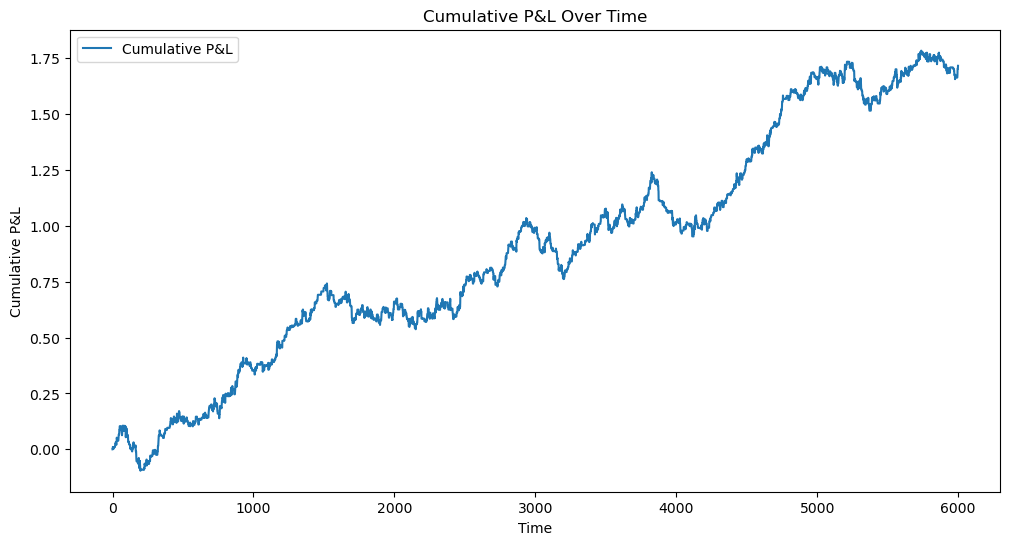

Optimal Build Threshold: 0.30000000000000004
Optimal Liquidate Threshold: 0.1
Maximized Total P&L: 2.019203585723958
{'Total P&L': 2.019203585723958, 'Average Daily P&L': 0.00033653393095399334, 'Max Drawdown': 0.34176219168687383}


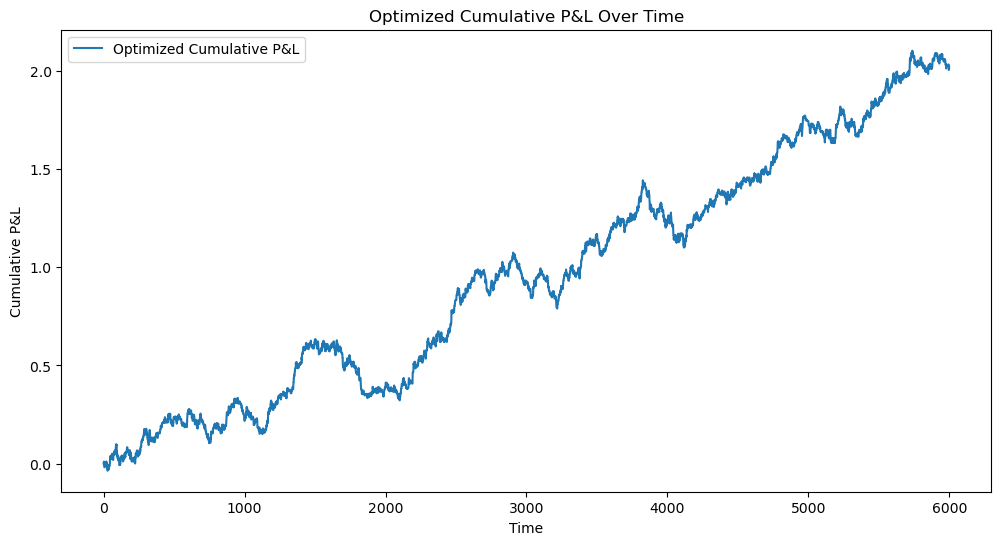

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the TradingStrategy class
class TradingStrategy:
    def __init__(self, build_threshold, liquidate_threshold):
        self.build_threshold = build_threshold
        self.liquidate_threshold = liquidate_threshold
        self.position = 0

    def apply_strategy(self, data):
        positions = []
        for i in range(len(data)):
            alpha = data.loc[i, 'alpha']

            if alpha > self.build_threshold:
                if self.position == 0:
                    self.position = 1
                elif self.position == -1:
                    self.position = 0

            elif alpha < -self.build_threshold:
                if self.position == 0:
                    self.position = -1
                elif self.position == 1:
                    self.position = 0

            elif abs(alpha) < self.liquidate_threshold:
                self.position = 0

            positions.append(self.position)

        data['position'] = positions
        return data

# Define the BacktestEngine class
class BacktestEngine:
    def __init__(self, data):
        self.data = data

    def calculate_returns(self):
        self.data['return'] = self.data['price'].pct_change()

    def calculate_pnl(self):
        self.data['pnl'] = self.data['position'].shift(1) * self.data['return']
        self.data['pnl'].fillna(0, inplace=True)
        self.data['cumulative_pnl'] = self.data['pnl'].cumsum()

    def generate_pnl_statement(self):
        total_pnl = self.data['cumulative_pnl'].iloc[-1]
        average_daily_pnl = self.data['pnl'].mean()
        max_drawdown = (self.data['cumulative_pnl'].cummax() - self.data['cumulative_pnl']).max()

        pnl_statement = {
            'Total P&L': total_pnl,
            'Average Daily P&L': average_daily_pnl,
            'Max Drawdown': max_drawdown
        }

        return pnl_statement

# Define the function to optimize thresholds
def optimize_thresholds(data, build_thresholds, liquidate_thresholds):
    best_pnl = -np.inf
    best_build_threshold = None
    best_liquidate_threshold = None

    for build_threshold in build_thresholds:
        for liquidate_threshold in liquidate_thresholds:
            strategy = TradingStrategy(build_threshold, liquidate_threshold)
            data_with_positions = strategy.apply_strategy(data.copy())
            
            backtest = BacktestEngine(data_with_positions)
            backtest.calculate_returns()
            backtest.calculate_pnl()
            
            pnl_statement = backtest.generate_pnl_statement()
            total_pnl = pnl_statement['Total P&L']

            if total_pnl > best_pnl:
                best_pnl = total_pnl
                best_build_threshold = build_threshold
                best_liquidate_threshold = liquidate_threshold

    return best_build_threshold, best_liquidate_threshold, best_pnl

# Task 1: Static Thresholds
# Load the dataset
file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_1.csv'  # Update the path as per your local setup
data = pd.read_csv(file_path)

# Initialize thresholds and position
build_threshold = 0.6
liquidate_threshold = 0.2
position = 0

# Initialize a list to store positions
positions = []

# Iterate over the data
for i in range(len(data)):
    alpha = data.loc[i, 'alpha']
    
    if alpha > build_threshold:
        if position == 0:
            position = 1
        elif position == -1:
            position = 0
    
    elif alpha < -build_threshold:
        if position == 0:
            position = -1
        elif position == 1:
            position = 0
    
    elif abs(alpha) < liquidate_threshold:
        position = 0
    
    positions.append(position)

# Add the positions to the dataset
data['position'] = positions

# Save the modified dataset
output_file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_data_with_positions.csv'
data.to_csv(output_file_path, index=False)

# Display the modified dataset
print(data.head())

# Task 2: Backtesting Engine
# Load the dataset
file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_data_with_positions.csv'
data = pd.read_csv(file_path)

# Calculate returns
data['return'] = data['price'].pct_change()

# Compute P&L
data['pnl'] = data['position'].shift(1) * data['return']
data['pnl'].fillna(0, inplace=True)

# Compute cumulative P&L
data['cumulative_pnl'] = data['pnl'].cumsum()

# Generate P&L statement
total_pnl = data['cumulative_pnl'].iloc[-1]
average_daily_pnl = data['pnl'].mean()
max_drawdown = (data['cumulative_pnl'].cummax() - data['cumulative_pnl']).max()

# Display the P&L statement
pnl_statement = {
    'Total P&L': total_pnl,
    'Average Daily P&L': average_daily_pnl,
    'Max Drawdown': max_drawdown
}

print("P&L Statement")
print("-------------")
for key, value in pnl_statement.items():
    print(f"{key}: {value}")

# Save the dataset with P&L calculations
output_file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_data_with_pnl.csv'
data.to_csv(output_file_path, index=False)

# Display the modified dataset
print(data.head())

# Plot P&L graph
plt.figure(figsize=(12, 6))
plt.plot(data['cumulative_pnl'], label='Cumulative P&L')
plt.xlabel('Time')
plt.ylabel('Cumulative P&L')
plt.title('Cumulative P&L Over Time')
plt.legend()
plt.show()

# Task 3: Optimizing Thresholds
# Load the dataset
file_path = 'C:/Users/ASUS/Desktop/Prospace/asset_1.csv'
data = pd.read_csv(file_path)

# Define the range of thresholds to search
build_thresholds = np.linspace(0.1, 1.0, 10)
liquidate_thresholds = np.linspace(0.1, 0.5, 5)

# Find the optimal thresholds
best_build_threshold, best_liquidate_threshold, best_pnl = optimize_thresholds(data, build_thresholds, liquidate_thresholds)

print(f"Optimal Build Threshold: {best_build_threshold}")
print(f"Optimal Liquidate Threshold: {best_liquidate_threshold}")
print(f"Maximized Total P&L: {best_pnl}")

# Check the resulting data for verification
strategy = TradingStrategy(best_build_threshold, best_liquidate_threshold)
data_with_positions = strategy.apply_strategy(data.copy())
backtest = BacktestEngine(data_with_positions)
backtest.calculate_returns()
backtest.calculate_pnl()
pnl_statement = backtest.generate_pnl_statement()

print(pnl_statement)

# Plot P&L graph for optimized strategy
plt.figure(figsize=(12, 6))
plt.plot(data_with_positions['cumulative_pnl'], label='Optimized Cumulative P&L')
plt.xlabel('Time')
plt.ylabel('Cumulative P&L')
plt.title('Optimized Cumulative P&L Over Time')
plt.legend()
plt.show()


-------------------------------------------------------------------------